In [2]:
from gibbs import *

In [3]:
file_name = "gs_maxcut.txt"
file1 = open(file_name,"r")
first_line = file1.readline()[:-1].split("\t") # first line

all_files = []
for line in file1:
    arr = line[:-1].split("\t")
    all_files += [[int(elem) for elem in arr]]

In [4]:
def plot_cuts(cuts, _cut, file_name):
    cuts = cuts.reshape(len(cuts), 2).T
    plt.plot(cuts[0], [_cut]*len(cuts[0]), label="Theoretical Max Cut")
    plt.plot(cuts[0], cuts[1], label="Algorithm Max Cut")

In [5]:
def plot_max_cut_efficiency_discrete(i, j, all_files, num_trials, step_size):
    filename, _cut = get_filename_and_cut(i, j, all_files)
    file1 = open(filename,"r")
    arr = file1.readline()[:-1].split("\t") # first line
    num_vertices = int(arr[0])
    W, b = get_W_and_b(file1, num_vertices)
    approximator = Max_Cut_Approximator(num_vertices)
    cuts, result = approximator.get_cut_sizes_discrete(num_trials, -0.5*W, b, step_size, False)
    cuts = np.array(cuts).T
    cuts[0] = cuts[0]*num_vertices
    cuts = cuts.T
    cuts = cuts.reshape(len(cuts), 2).T
    plt.plot(cuts[0], cuts[1], label="Discrete Max Cut")
    return result, cuts

def plot_max_cut_efficiency_continuous(i, j, all_files, num_trials):
    filename, _cut = get_filename_and_cut(i, j, all_files)
    file1 = open(filename,"r")
    arr = file1.readline()[:-1].split("\t") # first line
    num_vertices = int(arr[0])
    W, b = get_W_and_b(file1, num_vertices)
    approximator = Max_Cut_Approximator(num_vertices)
    cuts, result = approximator.get_cut_sizes_continuous(num_trials, -0.5*W, b, False)
    cuts = np.array(cuts).reshape(len(cuts), 2).T
    plt.plot(cuts[0], cuts[1], label="Continuous Max Cut")
    return result, cuts

def plot_max_cut_efficiency_continuous_rbm(i, j, all_files, num_trials, coupling):
    filename, _cut = get_filename_and_cut(i, j, all_files)
    file1 = open(filename,"r")
    arr = file1.readline()[:-1].split("\t") # first line
    num_vertices = int(arr[0])
    W, b = get_W_and_b_rbm(file1, num_vertices, coupling)
    approximator = Max_Cut_Approximator(2*num_vertices)
    cuts, result = approximator.get_cut_sizes_continuous(num_trials, -0.5*W, b, True)
    cuts = np.array(cuts).reshape(len(cuts), 2).T
    plt.plot(cuts[0], cuts[1], label="Continuous RBM Max Cut")
    return result, cuts

def plot_max_cut_efficiency_discrete_rbm(i, j, all_files, num_trials, step_size, coupling):
    filename, _cut = get_filename_and_cut(i, j, all_files)
    file1 = open(filename,"r")
    arr = file1.readline()[:-1].split("\t") # first line
    num_vertices = int(arr[0])
    W, b = get_W_and_b_rbm(file1, num_vertices, coupling)
    approximator = Max_Cut_Approximator(2*num_vertices)
    cuts, result = approximator.get_cut_sizes_discrete(num_trials, -0.1*W, b, step_size, True)
    cuts = np.array(cuts).T
    cuts[0] = cuts[0]*2
    cuts = cuts.T
    cuts = cuts.reshape(len(cuts), 2).T
    plt.plot(cuts[0], cuts[1], label="Discrete RBM Max Cut")
    return result, cuts

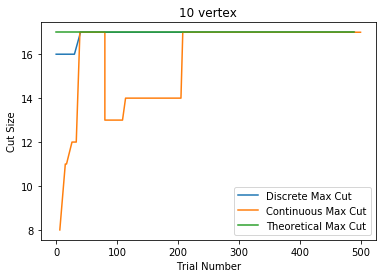

In [15]:
x, cuts = plot_max_cut_efficiency_discrete(0, 0, all_files, 50, 1)
x, cuts1 = plot_max_cut_efficiency_continuous(0, 0, all_files, 500)
plt.plot(cuts[0], [17]*len(cuts[0]), label="Theoretical Max Cut")
plt.xlabel("Trial Number")
plt.ylabel("Cut Size")
plt.title("10 vertex")
plt.legend()
plt.show()

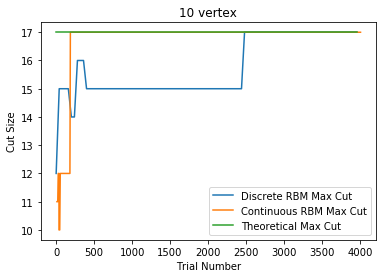

In [16]:
x, cuts = plot_max_cut_efficiency_discrete_rbm(0, 0, all_files, 2000, 20, 20)
x, cuts1 = plot_max_cut_efficiency_continuous_rbm(0, 0, all_files, 4000, 10)
plt.plot(cuts[0], [17]*len(cuts[0]), label="Theoretical Max Cut")
plt.xlabel("Trial Number")
plt.ylabel("Cut Size")
plt.title("10 vertex")
plt.legend()
plt.show()

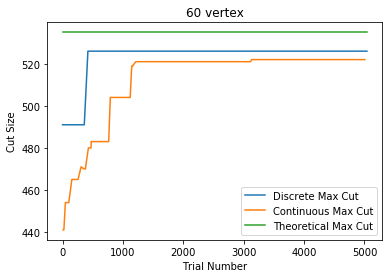

In [20]:
x, cuts = plot_max_cut_efficiency_discrete(5, 0, all_files, 85, 1)
x, cuts1 = plot_max_cut_efficiency_continuous(5, 0, all_files, 5000)
plt.plot(cuts[0], [535]*len(cuts[0]), label="Theoretical Max Cut")
plt.xlabel("Trial Number")
plt.ylabel("Cut Size")
plt.title("60 vertex")
plt.legend()
plt.show()

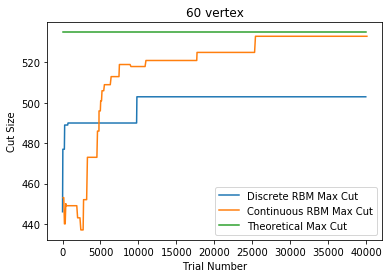

In [22]:
x, cuts = plot_max_cut_efficiency_discrete_rbm(5, 0, all_files, 20000, 20, 20)
x, cuts1 = plot_max_cut_efficiency_continuous_rbm(5, 0, all_files, 40000, 10)
plt.plot(cuts[0], [535]*len(cuts[0]), label="Theoretical Max Cut")
plt.xlabel("Trial Number")
plt.ylabel("Cut Size")
plt.title("60 vertex")
plt.legend()
plt.show()

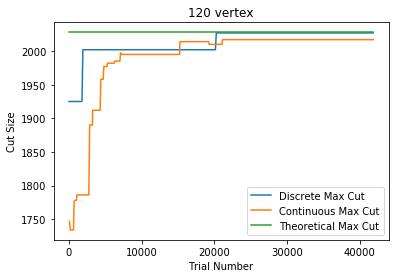

In [8]:
x, cuts = plot_max_cut_efficiency_discrete(11, 0, all_files, 350, 1)
x, cuts1 = plot_max_cut_efficiency_continuous(11, 0, all_files, 380*110)
plt.plot(cuts[0], [2028]*len(cuts[0]), label="Theoretical Max Cut")
plt.xlabel("Trial Number")
plt.ylabel("Cut Size")
plt.title("120 vertex")
plt.legend()
plt.show()

/Users/lilichen/Desktop/mcmc/gibbs.py:84: RuntimeWarning: divide by zero encountered in double_scalars
  times = [-np.log(1-np.random.uniform(0,1))/lambdas[i] for i in range(self.size)]


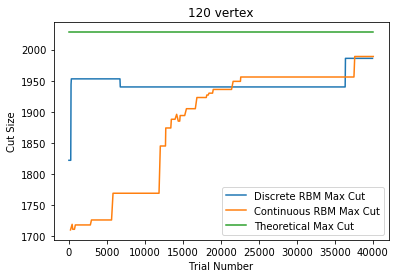

In [24]:
x, cuts = plot_max_cut_efficiency_discrete_rbm(11, 0, all_files, 20000, 20, 20)
x, cuts1 = plot_max_cut_efficiency_continuous_rbm(11, 0, all_files, 40000, 10)
plt.plot(cuts[0], [2028]*len(cuts[0]), label="Theoretical Max Cut")
plt.xlabel("Trial Number")
plt.ylabel("Cut Size")
plt.title("120 vertex")
plt.legend()
plt.show()